In [9]:
import geopandas as gp 
import sqlite3
from  itertools import groupby
from matplotlib import pyplot as plt

In [10]:
import geopandas as gp 
import sqlite3
from  itertools import groupby
from matplotlib import pyplot as plt
shp_file = gp.read_file('taxi_zones.shp')

Wall time: 1.89 s


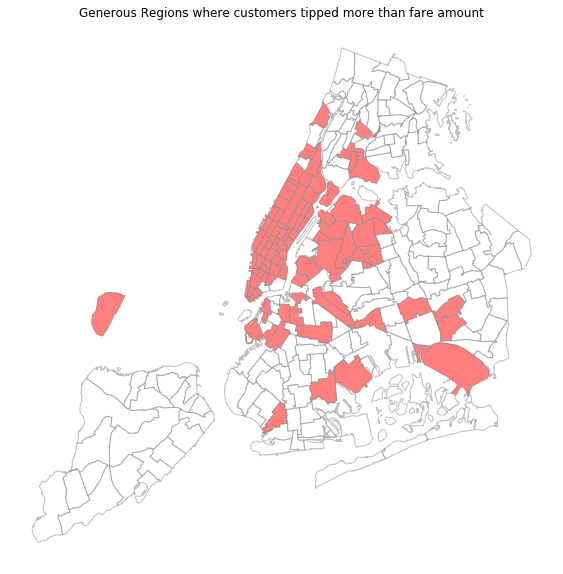

In [3]:
%%time
import geopandas as gp 
import sqlite3
from  itertools import groupby
from matplotlib import pyplot as plt
shp_file = gp.read_file('taxi_zones.shp')
conn = sqlite3.connect('taxi_db_s.db')
c = conn.cursor()
c.execute('select PULocationID from taxi_Details where tip_amount>fare_amount')
result = list(c)
result.sort()
frequency = [len(list(group)) for key, group in groupby(result)]
u_result = list(dict.fromkeys(result))
ind_result = []
for i in u_result:
    ind_result.append(i[0]-1)
i=0
top_ten_loc = []
while(i<10):
    i += 1
    top_ten_loc.append(u_result[frequency.index(max(frequency))][0]-1)
    frequency[frequency.index(max(frequency))]=0
df1=shp_file.iloc[ind_result].plot(figsize=(10,10), color='red')
plt.axis('off')
shp_file.plot(figsize = (10,10),ax=df1, edgecolor='gray',color='white', alpha=0.5);
plt.title('Generous Regions where customers tipped more than fare amount')

plt.savefig('Insight #3_1')


Wall time: 741 ms


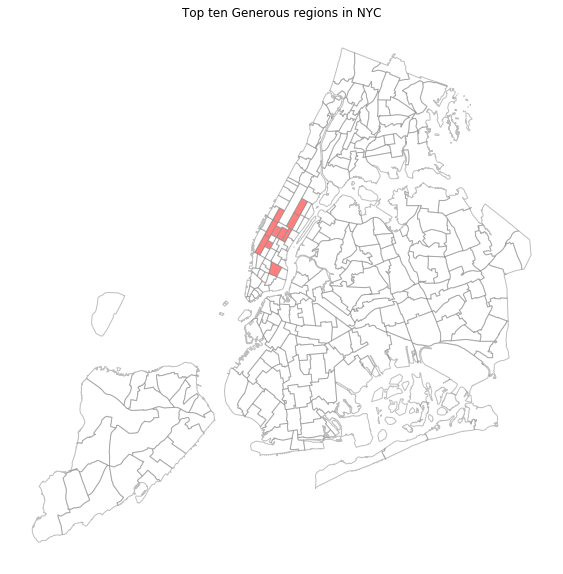

In [5]:
%%time
df=shp_file.iloc[top_ten_loc].plot(figsize=(10,10), color='red')
shp_file.plot(figsize = (10,10),ax=df, edgecolor='gray',color='white', alpha=0.5);
plt.axis('off')
plt.title('Top ten Generous regions in NYC')
plt.savefig('Insight #3_2')

In [14]:
len(ind_result)

94

In [15]:
i=0
top_ten_loc = []
while(i<10):
    i += 1
    top_ten_loc.append(u_result[frequency.index(max(frequency))][0]-1)
    frequency[frequency.index(max(frequency))]=0

In [16]:
top_ten_loc

[235, 185, 229, 161, 47, 78, 160, 67, 141, 236]

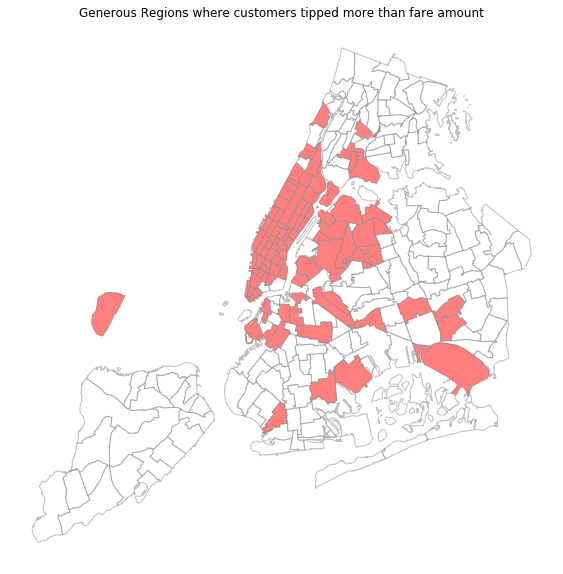

In [17]:
df1=shp_file.iloc[ind_result].plot(figsize=(10,10), color='red')
plt.axis('off')
shp_file.plot(figsize = (10,10),ax=df1, edgecolor='gray',color='white', alpha=0.5);
plt.title('Generous Regions where customers tipped more than fare amount')

plt.savefig('Insight #3_1')


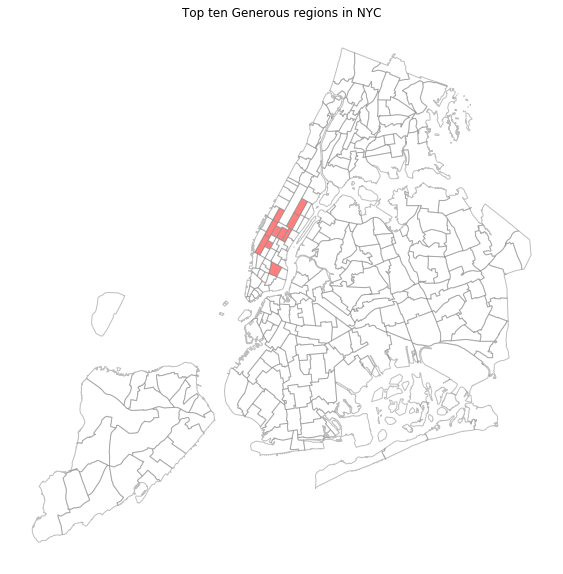

In [18]:
df=shp_file.iloc[top_ten_loc].plot(figsize=(10,10), color='red')
shp_file.plot(figsize = (10,10),ax=df, edgecolor='gray',color='white', alpha=0.5);
plt.axis('off')
plt.title('Top ten Generous regions in NYC')
plt.savefig('Insight #3_2')

In [24]:
c.execute('select vendorID from taxi_Details where tip_amount>fare_amount')
rset = list(c)
rset.sort()
freq = [len(list(group)) for key, group in groupby(rset)]

In [25]:
freq

[391, 538]

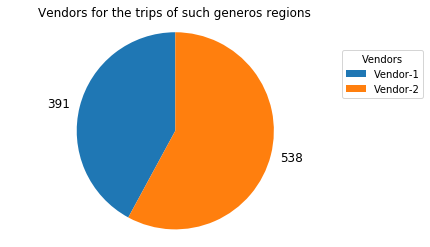

In [29]:
plt.pie(freq,labels=freq,textprops={'fontsize': 12}, counterclock=True,startangle=90)
plt.axis('equal')

plt.legend(['Vendor-1','Vendor-2'],title='Vendors', bbox_to_anchor=(1.1,0.7),loc='right', bbox_transform=plt.gcf().transFigure)
plt.title("Vendors for the trips of such generos regions")
plt.savefig('Insight #3_3')
plt.show()


In [27]:
conn.close()